>*This is an interactive `jupyter` notebook version (figures only) of the paper [arXiv:1906.08263](https://arxiv.org/abs/1906.08263). Run the notebook to make the plots interactive: first **open in playground**, then **run each cell one-by-one**. The interactive plots are generated on the server side, so they may be a little slow to respond. For a smoother experience, you may connect this notebook to your local jupyter server, or download the notebook and directly run it from your local server. [Here]( https://colab.research.google.com/drive/10jw5T07mhvdP0hp60HqVqNqWK49Cfzby) is the full-text version of the notebook.*

# Unified lensing and kinematic analysis for _any_ elliptical mass profile

### Anowar J. Shajib <a href="https://orcid.org/0000-0002-5558-888X"><img alt="https://orcid.org/0000-0002-5558-888X" src="https://orcid.org/sites/default/files/images/orcid_16x16(1).gif" style="height:16px; margin-left:4px; margin-right:4px; width:16px"></a>

_Department of Physics and Astronomy, University of California, Los Angeles, CA 90095-1547, US_

Email: ajshajib@astro.ucla.edu

>>## Abstract
  
>>We demonstrate an efficient method to compute the strong-gravitational-lensing deflection angle and magnification for any elliptical surface-density profile. This method solves a numerical hurdle in lens modelling that has lacked a general solution for nearly three decades. The hurdle emerges because it is prohibitive to derive analytic expressions of the lensing quantities for most elliptical mass profiles. In our method, we first decompose an elliptical mass profile into concentric Gaussian components. We introduce an integral transform that provides us with a fast and accurate algorithm for this Gaussian decomposition. We derive analytic expressions of the lensing quantities for a Gaussian component. As a result, we can compute these quantities for the total mass profile by adding up the contributions from the individual components. This lensing analysis self-consistently completes the kinematic description in terms of Gaussian components presented by Cappellari ([2008](http://adsabs.harvard.edu/abs/2008MNRAS.390...71C)). Our method is general without extra computational burden unlike other methods currently in use.

---




##### Pre-loading packages and codes

In [ ]:
!pip install lenstronomy

     |████████████████████████████████| 5.8MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/58/ba/a1/983a88d921a559e52db01095b532a4113c9e545226a879d4ab
Successfully built lenstronomy


In [ ]:
!pip install mgefit

     |████████████████████████████████| 11.5MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/b6/ad/08/a25b9fd4e4419d304787593dda44651238bec609ca340e1187
Successfully built mgefit


In [ ]:
import lenstronomy

lenstronomy.__version__

'0.8.2'

In [ ]:
## plot settings

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', context='paper', #font='Helvetica', 
        font_scale=1.5)
sns.set_style({"xtick.direction": "in","ytick.direction": "in", 
               "axes.linewidth": 1.5})

def set_font_scale(font_scale):
    sns.set(style='ticks', context='paper', font='Times New Roman', 
            font_scale=font_scale)
    sns.set_style({"xtick.direction": "in","ytick.direction": "in", 
                   "axes.linewidth": 1.5,})
    
# from cb2
emerald = '#66c2a5' #sns.xkcd_rgb['emerald']
orange = '#fc8d62' #sns.xkcd_rgb['bright orange']
blue = '#8da0cb' #sns.xkcd_rgb['light purple'] 
pink = '#e78ac3'


cmap = sns.cubehelix_palette(start=0.5, rot=-1.5, gamma=1, hue=1, light=-0., 
                             dark=0.8, reverse=False, as_cmap=True)

## Figure 1

In [ ]:
import numpy as np
from ipywidgets import interact
from ipywidgets import FloatSlider
from ipywidgets import IntSlider

from lenstronomy.LensModel.Profiles.nfw_ellipse import NFW_ELLIPSE
from lenstronomy.LensModel.Profiles.sersic_ellipse_potential import SersicEllipse
from lenstronomy.Util.param_util import phi_q2_ellipticity

import matplotlib.gridspec as gridspec
import matplotlib.patches

sersic = SersicEllipse()

n = 50
width = 2
x = np.linspace(-width, width, n)
y = np.linspace(-width, width, n)

X, Y = np.meshgrid(x, y)
Xf = X.flatten()
Yf = Y.flatten()
  
def plot_potential_to_density_contours(q, n_sersic):
    fig = plt.figure(figsize=(8, 6))
    gs1 = gridspec.GridSpec(1, 2)
    gs1.update(left=0.0, right=1., wspace=0.0, hspace=0.05)
    axes = []
    axes.append(fig.add_subplot(gs1[0, 0]))
    axes.append(fig.add_subplot(gs1[0, 1]))

    r_sersic = 1
    k_eff = 5
    pa = 0

    e1, e2 = phi_q2_ellipticity(pa, q)

    f = sersic.function(Xf, Yf, n_sersic, r_sersic, k_eff, e1, e2)
    f = f.reshape((n, -1))

    f_xx, f_yy, _ = sersic.hessian(Xf, Yf, n_sersic, r_sersic, k_eff, e1, e2)
    kappa = (f_xx + f_yy).reshape((n, -1))

    levels = np.array([0, width-0.2]) #np.linspace(0, w-0.2, 5)
    pot_lines = sersic.function(levels, levels*0, n_sersic, r_sersic, k_eff, 
                                e1, e2)

    p = .7
    pot_lines = np.linspace(pot_lines[0]**p, pot_lines[1]**p, 5)**(1/p)

    reds = [ '#fd8d3c', '#fc4e2a', '#e31a1c', '#b10026']
    reds.reverse()
    blues = ['#0c2c84', '#225ea8', '#1d91c0', '#41b6c4', '#7fcdbb']

    axes[0].contour(X, Y, f, levels=pot_lines[1:], linestyles=['--'], 
                    linewidths=[1.3], colors=blues)
    axes[0].axis('equal')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_xlim(-width, width)
    axes[0].set_ylim(-width, width)

    axes[0].annotate(r'$q=${:.2f}'.format(q), (-width*0.8, width*0.8))

    _f_xx, _f_yy, _ = sersic.hessian(levels, levels*0, n_sersic, r_sersic,
                                     k_eff, e1, e2)
    kappa_lines = _f_xx + _f_yy

    kappa_lines = 1/np.linspace(1/kappa_lines[1]**p, 
                                1/kappa_lines[0]**p, 5)**(1/p)

    axes[1].contour(X, Y, kappa, linestyles=['-'], levels=kappa_lines[:-1], 
                    linewidths=[1.3], colors=reds)
    axes[1].axis('equal')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_xlim(-width, width)
    axes[1].set_ylim(-width, width)  

    # 1. Get transformation operators for axis and figure
    ax0tr = axes[0].transData # Axis 0 -> Display
    ax1tr = axes[1].transData # Axis 1 -> Display
    figtr = fig.transFigure.inverted() # Display -> Figure
    # 2. Transform arrow start point from axis 0 to figure coordinates
    ptB = figtr.transform(ax0tr.transform((width-0.15, 0.)))
    # 3. Transform arrow end point from axis 1 to figure coordinates
    ptE = figtr.transform(ax1tr.transform((-width+0.18, 0.)))

    arrow = matplotlib.patches.FancyArrowPatch(
        ptB, ptE, transform=fig.transFigure,  # Place arrow in figure coord system
        fc = "white", edgecolor='k', connectionstyle="arc3,rad=0.0", 
        arrowstyle='simple,head_length=0.45,head_width=.8,tail_width=0.35', 
        alpha = 1., mutation_scale = 15., linewidth=1.1)
    # 5. Add patch to list of objects to draw onto the figure
    fig.patches.append(arrow)


    axes[0].set_title(r'Deflection potential')
    axes[1].set_title(r'Surface density')

    plt.show()

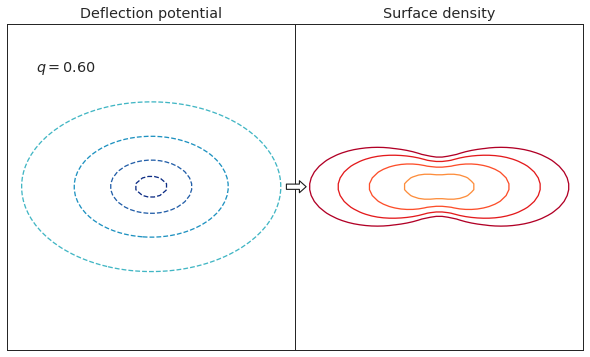

In [ ]:
interact(plot_potential_to_density_contours, 
         q=FloatSlider(min=0.1, max=0.95, step=0.05, value=0.6, continuous_update=False), 
         n_sersic=FloatSlider(min=1, max=6, step=0.5, value=4, continuous_update=False));

#plot_potential_to_density_contours(q=0.6, n_sersic=4)

>**Figure 1:** Elliptical deflection potential (left column) producing dumbbell-shaped surface-density (right column). The dashed contours in the left column are isopotential curves for Sersic profile with $n_{\rm \text{Sersic}}=4$, and the solid contours in the right column are corresponding isodensity curves. The axis ratios are $q=0.8$ in the top row, and $q=0.6$ in the bottom row. The dumbbell shape in surface density is unphysical and it gets more pronounced for higher ellipticity in the deflection potential. Hence, we can not use elliptical deflection potential to simplify lensing analysis of moderately elliptical galaxies. We need to treat ellipticity in the surface density, not deflection potential, to make our lensing analysis generally consistent with our physical priors.

## Figure 2

<center><img align="center" src="https://docs.google.com/uc?export=download&id=13xbKEONDsdwVZXGFK0vgE5vKUWBGYcvD"  width="900"  /></center>

>**Figure 2.** "Divide and conquer'' strategy to compute lensing quantities for elliptical surface-density profile. In this figure, we choose the deflection field as the quantity of interest to illustrate the method. However, this method works equally well for other quantities such as the lensing shear and the line-of-sight velocity dispersion. The steps in the strategy are organized into columns and the arrows show the progression of the steps. We explain each step in the text at the top of the corresponding column.

## Figure 3

In [ ]:
from scipy.special import comb
import cmath

P = 10

## Euler nodes and weights
kes = np.arange(2*P+1)
betas = np.sqrt(2*P * np.log(10) / 3. + 1j * 2*np.pi * kes)
epsilons = np.zeros(2*P+1)

epsilons[0] = 0.5
epsilons[1:P+1] = 1.
epsilons[-1] = 1/2**P

for k in range(1, P):
    epsilons[2*P-k] = epsilons[2*P-k+1] + 1/2**P * comb(P, k)

etas = (-1)**kes * epsilons * 2 * np.sqrt(2*np.pi) * 10**(P/3)


def transform(func, sigmas, **kwargs):
    """
    """
    f_sigmas = np.zeros_like(sigmas)

    f_sigmas = np.sum(etas * func(sigmas[:,np.newaxis]*betas[np.newaxis, :],
                                  **kwargs).real, 
                      axis=1
                     )

    return f_sigmas


def decompose(func, sigma_start=0.02, sigma_end=15, N_sigma=15, **kwargs):
    """
    Compute the amplitudes and sigmas of Gaussian components using the
    integral transform with Gaussian kernel. The returned values are in the 
    convention of eq. (2.13).
    """
    sigmas = np.logspace(np.log10(sigma_start), np.log10(sigma_end), N_sigma)

    f_sigmas = transform(func, sigmas, **kwargs)

    # weighting for trapezoid method integral
    f_sigmas[0] *= 0.5
    f_sigmas[-1] *= 0.5

    del_log_sigma = np.abs(np.diff(np.log(sigmas)).mean())

    f_sigmas *= del_log_sigma / np.sqrt(2.*np.pi)

    return f_sigmas, sigmas
  

def sersic_func(R, n_sersic=1):
    """
    """
    b_n = 1.9992 * n_sersic - 0.3271

    return np.exp(-b_n*R**(1./n_sersic) + b_n)


def nfw_func(R, r_s=5, amp=1./1.39552425):
    """
    """
    shape = R.shape
    R = R.flatten()
    x = R/r_s
    
    f = np.empty(shape=x.shape, dtype=x.dtype)
    
    range1 = (x > 1.)
    if np.any(range1):
        s = x[range1]
        f[range1] = (1 - np.arccos(1/s) / np.sqrt(s*s - 1)) / (s*s - 1)
      
    range2 = (x < 1.)
    if np.any(range2):
        s = x[range2]
        f[range2] = (1 - np.arccosh(1/s) / np.sqrt(1 - s*s)) / (s*s - 1)
        
    range3 = np.logical_and(np.logical_not(range1), np.logical_not(range2))
    if np.any(range3):
        s = x[range3]
        f[range3] = 1./3.

    return amp * f.reshape(shape)


def sum_gauss_components(R, A_sigmas, sigmas):
    """
    """
    total = np.zeros_like(R)

    for i, r in enumerate(R):
        total[i] = np.sum(A_sigmas * np.exp(-r*r/2/sigmas**2))

    return total

In [ ]:
def plot_gauss_decompose(NFW=True, n_sersic=4, N_sigma=15,
                         sigma_start=0.02, sigma_end=15):
    """
    """
    blue = '#4575b4'
    red = '#d73027'
    
    r_s = 5
    
    sigs = np.logspace(-2, 2, 1000)
    f_sigs_sersic =  transform(sersic_func, sigs, n_sersic=n_sersic)
    f_sigs_nfw = transform(nfw_func, sigs, r_s=r_s)

    amps_sersic, sigmas_sersic = decompose(sersic_func, sigma_start=sigma_start, 
                             sigma_end=sigma_end, N_sigma=N_sigma,
                             n_sersic=n_sersic)
    
    amps_nfw, sigmas_nfw = decompose(nfw_func, sigma_start=0.005*r_s, 
                             sigma_end=50*r_s, N_sigma=15,
                             r_s=r_s)

    Rs = np.logspace(-1, 1, 500)
    sersic_approx = sum_gauss_components(Rs, amps_sersic, sigmas_sersic)
    nfw_approx = sum_gauss_components(Rs, amps_nfw, sigmas_nfw)

    sersic_true = sersic_func(Rs, n_sersic=n_sersic)
    nfw_true = nfw_func(Rs, r_s=r_s)
    
    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131)
    ax1.loglog(sigs, f_sigs_sersic, color=blue, lw=2., ls='-')

    for s in sigmas_sersic:
        ax1.axvline(s, .97, 1, color=blue)
    
    if NFW:
        ax1.loglog(sigs, f_sigs_nfw, color=red, lw=2., ls='--')
            
        for s in sigmas_nfw:
            ax1.axvline(s, .97, 1, color=red)
    
    ax1.set_ylim(1e-4, 1e3)
    ax1.set_xlim(1e-2, 1e2)
    #ax1.axis('equal')
    #ax1.legend()
    ax1.set_xlabel(r'$\sigma$')
    ax1.set_ylabel(r'$f\ (\sigma)$')

    ax2 = fig.add_subplot(132)
    #ax2.loglog(Rs, sersic_true, color='k', lw=2., ls='-')
    ax2.loglog(Rs, sersic_approx, color=blue, lw=2., ls='-')
    if NFW:
        ax2.loglog(Rs, nfw_approx, color=red, lw=2., ls='--')
    ax2.set_ylim(1e-4, 1e3)
    ax2.set_xlim(1e-1, 1e1)
    #ax2.axis('equal')
    #ax1.legend()
    ax2.set_xlabel(r'$R/R_{\rm eff}$')
    ax2.set_ylabel(r'$\Sigma_{\rm approx}$')

    ax3 = fig.add_subplot(133)
    ax3.plot(Rs, (sersic_true - sersic_approx)/np.sqrt(sersic_true)*100, 
             color=blue, lw=2., ls='-', 
             label=r'$n_{\rm Sersic}=$'+'{}'.format(n_sersic))
    if NFW:
        ax3.plot(Rs, (nfw_true - nfw_approx)/np.sqrt(nfw_true)*100, 
                 color=red, lw=2., ls='--', label=r'Projected NFW')
    ax3.set_xscale('log')
    ax3.set_ylim(-2, 2)
    ax3.set_xlim(1e-1, 1e1)
    ax3.set_xlabel(r'$R/R_{\rm eff}$')
    ax3.set_ylabel(r'Residual / Noise')
    ax3.legend()

    fig.tight_layout()
    plt.show()

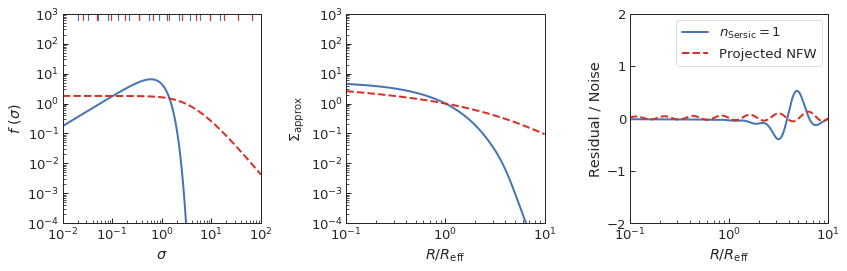

In [ ]:
interact(plot_gauss_decompose, 
         n_sersic=FloatSlider(min=1., max=6., step=0.5, value=1., continuous_update=False),
         N_sigma=IntSlider(min=10, max=20, value=15, continuous_update=False), 
         sigma_start=FloatSlider(min=0.01, max=0.05, step=0.005, value=0.02, continuous_update=False), 
         sigma_end=FloatSlider(min=10, max=20, step=1, value=15, continuous_update=False));

#plot_gauss_decompose(n_sersic=1)

>**Figure 3.** Decomposing the Sersic profile and the projected NFW profile into concentric Gaussian components using the integral transform with a Gaussian kernel. The solid blue lines correspond to the Sersic profiles. The red, dashed lines correspond to the two-dimensional projected NFW profile. Both profiles are normalized to have $\Sigma (R_{\rm eff}) = 1$. **Left:** the inverse transform $f(\sigma)$ of the Sersic profiles and the projected NFW profile. Here, we choose the NFW scale radius $r_{\rm s} = 5R_{\rm eff}$. To decompose a function into 15 Gaussian components, we only need to compute $f(\sigma)$ at 15 points. These points are marked along the top border as blue ticks for the Sersic profiles and as red ticks for the NFW profile. **Center:** recovering the original profile as $\Sigma_{\rm approx}(R)$ using the forward transform by combining the 15 Gaussian components. We do not plot the true form of $\Sigma_{\rm \text{Sersic}}(R)$ or $\Sigma_{\rm \text{NFW}}(R)$ because they are visually almost indistinguishable from $\Sigma_{\rm approx}(R)$. **Right:** noise-normalized difference between the recovered profile $\Sigma_{\rm approx}(R)$ and the true form of $\Sigma_{\rm \text{Sersic}}(R)$ or $\Sigma_{\rm \text{NFW}}(R)$. We assume 1 per cent Poisson noise at $R = R_{\rm eff}$ to obtain the noise level for normalizing the residual. Our method approximates the NFW profile and the Sersic profile as a sum of 15 Gaussians within the noise level for $0.1R_{\rm eff} \leq R \leq 10R_{\rm eff}$.

>*(Interactive options are set only for the Sersic profile.)*

## Figure 4

In [ ]:
from mgefit.mge_fit_1d import mge_fit_1d

def plot_mge_comparison(n_sersic=1, N_sigma=15):
    blue =  '#4575b4'

    R = np.logspace(-1, 1, 200)
    amps, sigs = decompose(sersic_func, N_sigma=N_sigma, n_sersic=n_sersic)

    sersic_approx = sum_gauss_components(R, amps, sigs)

    sersic_R = sersic_func(R, n_sersic=n_sersic)
    mge = mge_fit_1d(R, sersic_R, ngauss=N_sigma, plot=False, quiet=True)

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131)
    ax1.clear()

    for a, s in zip(amps, sigs):
        ax1.loglog(R, a*np.exp(-R**2/2/s**2)/np.sqrt(2*np.pi), color='#91bfdb', 
                   ls=':', lw=1.5)

    ax1.loglog(R, sersic_approx, color=blue, lw=2, 
               label=r'$n_{\rm Sersic}=1$')
    ax1.set_xlim(1e-1, 1e1)
    ax1.set_ylim(1e-4, 1e3)
    ax1.set_xlabel(r'$R/R_{\rm eff}$')
    ax1.set_ylabel(r'Our method  $\Sigma_{\rm approx}$')
    ax1.legend()
    
    ax2 = fig.add_subplot(132)
    ax2.clear()
    ax2.loglog(mge.x, mge.gauss*mge.weights[None, :], 'lightgrey', 
               lw=1.5, ls='-.')

    ax2.loglog(mge.x, mge.yfit, 'grey', lw=2, ls='--', 
               label=r'$n_{\rm Sersic}=1$')

    ax2.set_ylim(1e-4, 1e3)
    ax2.set_xlim(1e-1, 1e1)
    ax2.set_xlabel(r'$R/R_{\rm eff}$')
    ax2.set_ylabel(r"Cappellari (2002) $\Sigma_{\rm approx}$")
    ax2.legend()
    
    ax3 = fig.add_subplot(133)
    ax3.clear()
    ax3.plot(R, (sersic_R - sersic_approx)/np.sqrt(sersic_R)*100, color=blue, 
             lw=2., ls='-', label='Our method')
    ax3.plot(mge.x, (mge.err)/np.sqrt(mge.y)*100, color='grey', lw=2, ls='--', 
             label='Cappellari (2002)', zorder=-2)
    ax3.set_xscale('log')
    ax3.set_ylim(-2, 2)
    ax3.set_xlim(1e-1, 1e1)
    ax3.set_xlabel(r'$R/R_{\rm eff}$')
    ax3.set_ylabel(r'Residual / Noise')
    ax3.legend()
    
    fig.tight_layout()
    plt.show()

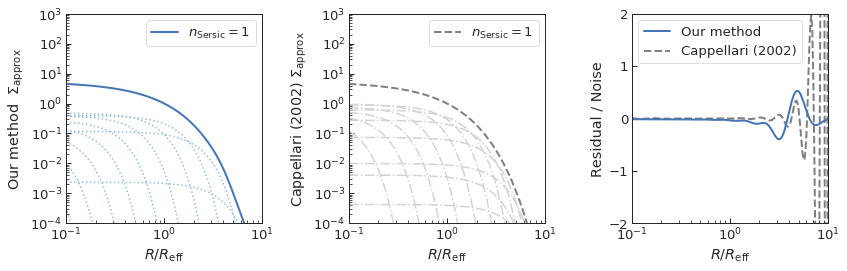

In [ ]:
interact(plot_mge_comparison, 
         n_sersic=FloatSlider(min=1, max=6, step=0.5, value=1, continuous_update=False), 
         N_sigma=IntSlider(min=10, max=20, value=15, continuous_update=False));

#plot_mge_comparison(n_sersic=1)

>**Figure 4.** Comparison between our method and the multi-Gaussian expansion (MGE) method from Cappellari ([2002](http://adsabs.harvard.edu/abs/2002MNRAS.333..400C)) to decompose a one-dimensional Sersic function into concentric Gaussian components. Here, we only show the case with $n_{\rm \text{Sersic}}=1$, however the cases for higher Sersic indices of for the projected NFW profile are qualitatively similar or better. **Left:** the Sersic function (solid, blue line) approximated with 15 Gaussian components using our Gaussian decomposition method. The dotted, lighter-blue lines show the individual Gaussian components. Some of the Gaussian components are out of the figure range. **Center:** same as the left figure but using the MGE method with 15 Gaussian components. The dashed, grey line shows the Sersic function approximated by MGE and the dot-dashed, lighter-grey lines show individual Gaussian components. **Right:** comparison of the noise-normalized residual for the two methods. We assume 1 per cent Poisson noise at effective radius $R_{\rm eff}$ to obtain the noise level for normalizing the residual. The MGE method approximates the Sersic function within the noise level up to $\sim 6 R_{\rm eff}$, whereas our method approximates the Sersic function within the noise level up to $10R_{\rm eff}$. More importantly, our method is $\sim 10^3$ times faster than the MGE method to decompose a one-dimensional function into concentric Gaussian components.


## Figure 5

In [ ]:
from scipy.special import wofz
from copy import deepcopy


class EllipticalGaussianLens(object):
    """
    """
    def __init__(self, min_ellipticity=1e-5):
        """
        """
        self.min_ellipticity = 1e-5
    
    def quarantine(self, q):
        """
        """
        if 1 - q < self.min_ellipticity:
            q = 1 - self.min_ellipticity
            
        return q
    
    def get_deflection(self, x, y, amp, sigma, q):
        """
        """
        q = self.quarantine(q)

        _p = q / sigma / np.sqrt(2 * (1. - q**2))

        sig_func_re, sig_func_im = self.sigma_function(_p * x, _p * y, q)

        alpha_x = amp * sigma * np.sqrt(2*np.pi/(
                1.-q**2)) * sig_func_re
        alpha_y = - amp * sigma * np.sqrt(
            2 * np.pi / (1. - q ** 2)) * sig_func_im

        return alpha_x, alpha_y
    
    def get_convergence(self, x, y, amp, sigma, q):
        """
        """
        return amp * np.exp(-(q*q*x*x + y*y)/2./sigma/sigma)
    
    def get_shear(self, x, y, amp, sigma, q):
        """
        """
        q = self.quarantine(q)

        _p = q / sigma / np.sqrt(2 * (1. - q**2))
        sig_func_re, sig_func_im = self.sigma_function(_p * x, _p * y, q)

        kappa = self.get_convergence(x, y, amp, sigma, q)

        shear = - 1/(1-q*q) * ((1+q**2)*kappa - 2*q*amp + np.sqrt(
            2*np.pi) * q*q * amp * (x - 1j*y) / sigma / np.sqrt(1-q*q) * (
            sig_func_re - 1j*sig_func_im))
        
        return shear.real, -shear.imag
    
    def get_magnification(self, x, y, amp, sigma, q):
        """
        """
        kappa = self.get_convergence(x, y, amp, sigma, q)
        g1, g2 = self.get_shear(x, y, amp, sigma, q)

        return 1. / ((1.-kappa)**2 - (g1**2+g2**2))

    def sigma_function(self, x, y, q):
        """
        Compute the function varsigma(z; q) from equation (4.12).

        :param x: Real part of complex variable, x = Re(z)
        :type x: float or numpy.array
        :param y: Imaginary part of complex variable, y = Re(z)
        :type y: float or numpy.array
        :param q: Axis ratio.
        :type q: float
        :return: value of Sigma function, equation (4.12) from Shajib (2019)
        :rtype: tuple (type, type) with type being type(x) or type(y)
        """
        y_sign = np.sign(y)
        y_ = deepcopy(y) * y_sign
        z = x + 1j * y_
        zq = q * x + 1j * y_ / q

        w = wofz(z)
        wq = wofz(zq)

        # exponential factor in the 2nd term of eqn. (4.15) of Shajib (2019)
        exp_factor = np.exp(-x * x * (1 - q * q) - y_ * y_ * (1 / q / q - 1))

        sigma_func_real = w.imag - exp_factor * wq.imag
        sigma_func_imag = (- w.real + exp_factor * wq.real) * y_sign    
        
        return sigma_func_real, sigma_func_imag

    def get_critical_curves(self, amp, sigma, q, compute_window=4, 
                            start_scale=0.05, max_order=10):
        """
        This method is modified from a `lenstronomy` function written by 
        Simon Birrer.
        
        :param amp:
        :param sigma:
        :param q:
        :param compute_window:
        :param tiling_scale:
        :return:
        """

        numPix = int(2 * compute_window / start_scale)
    
        arr = np.linspace(-compute_window, compute_window, numPix)
        x_grid_init, y_grid_init = np.meshgrid(arr, arr)

        mag_init = self.get_magnification(x_grid_init, y_grid_init, 
                                          amp, sigma, q) 

        x_crit_list = []
        y_crit_list = []
        
        # iterate through original triangles and return ra_crit, dec_crit list
        for i in range(numPix-1):
            for j in range(numPix-1):
                edge1 = [x_grid_init[i, j], y_grid_init[i, j], mag_init[i, j]]
                edge2 = [x_grid_init[i+1, j+1], y_grid_init[i+1, j+1], 
                         mag_init[i+1, j+1]]
                edge_90_1 = [x_grid_init[i, j+1], y_grid_init[i, j+1], 
                             mag_init[i, j+1]]
                edge_90_2 = [x_grid_init[i+1, j], y_grid_init[i+1, j], 
                             mag_init[i+1, j]]
                x_crit, y_crit = self._tiling_crit(edge1, edge2, edge_90_1, 
                                                   max_order, amp, sigma, q)
                x_crit_list += x_crit  # list addition
                y_crit_list += y_crit  # list addition
                x_crit, y_crit = self._tiling_crit(edge1, edge2, edge_90_2, 
                                                   max_order, amp, sigma, q)
                x_crit_list += x_crit  # list addition
                y_crit_list += y_crit  # list addition
                
        return np.array(x_crit_list), np.array(y_crit_list)

    def _tiling_crit(self, edge1, edge2, edge_90, max_order, amp, sigma, q):
        """
        Tile a rectangular triangle and compares the signs of the magnification. 
        This method is modified from a `lenstronomy` function written by Simon Birrer.

        :param edge1: [x_coordinate, y_coordinate, magnification]
        :param edge2: [x_coordinate, y_coordinate, magnification]
        :param edge_90: [x_coordinate, y_coordinate, magnification]
        :param max_order: maximal order to fold triangle
        :return:
        """
        x_1, y_1, mag_1 = edge1
        x_2, y_2, mag_2 = edge2
        x_3, y_3, mag_3 = edge_90
        sign_list = np.sign([mag_1, mag_2, mag_3])
        
        # if all signs are the same
        if sign_list[0] == sign_list[1] and sign_list[0] == sign_list[2]:
            return [], []
        else:
            # Split triangle along the long axis
            # execute tiling twice
            # add ra_crit and dec_crit together
            # if max depth has been reached, return the mean value in the triangle
            max_order -= 1
            
            if max_order <= 0:
                return [(x_1 + x_2 + x_3)/3], [(y_1 + y_2 + y_3)/3]
            else:
                # split triangle
                # find point in the middle of the long axis to split triangle
                x_90_ = (x_1 + x_2)/2 
                y_90_ = (y_1 + y_2)/2
                mag_90_ = self.get_magnification(x_90_, y_90_, amp, sigma, q)
                edge_90_ = [x_90_, y_90_, mag_90_]
                x_crit, y_crit = self._tiling_crit(edge_90, edge1, edge_90_, 
                                                   max_order, amp, sigma, q)
                x_crit_2, y_crit_2 = self._tiling_crit(edge_90, edge2, edge_90_, 
                                                       max_order, amp, sigma, q)
                x_crit += x_crit_2
                y_crit += y_crit_2
                
                return x_crit, y_crit
            
    def get_critical_curves_and_caustics(self, amp, sigma, q, **kwargs):
        """
        """
        x_crit, y_crit = self.get_critical_curves(amp, sigma, q, **kwargs)
        
        alpha_x, alpha_y = self.get_deflection(x_crit, y_crit, amp, sigma, q)
        
        x_caus, y_caus = x_crit - alpha_x, y_crit - alpha_y
        
        return x_crit, y_crit, x_caus, y_caus

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrow
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    """
    """
    def __init__(self):
        pass
    
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        """
        """
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        
        return [p]
    
    
def make_legend_arrow(legend, orig_handle,
                          xdescent, ydescent,
                          width, height, fontsize):
    """"""
    p = FancyArrow(0, 0.5*height, width, 0, width=1.5, 
                   length_includes_head=True, head_width=0.5*height, 
                   overhang=.1 )
    return p
        
        
def plot_gaussian_lens(amplitude=2., σ=1., q=0.5):
    """
    """
    amp = amplitude
    sigma = σ
    w = 4
    n = 11

    emerald = '#66c2a5' #sns.xkcd_rgb['emerald']
    orange = '#fc8d62' #sns.xkcd_rgb['bright orange']
    blue = '#8da0cb' #sns.xkcd_rgb['light purple'] 

    xs = np.linspace(-w, w, n)
    ys = np.linspace(-w, w, n)

    X, Y = np.meshgrid(xs, ys)
    
    gaussian_lens = EllipticalGaussianLens()
    
    kappa = gaussian_lens.get_convergence(X, Y, amp, sigma, q)
    alpha_x, alpha_y = gaussian_lens.get_deflection(X, Y, amp, sigma, q)

    x_01 = 0
    y_01 = w/4

    x_02 = 0
    y_02 = w/2

    x_03 = 0
    y_03 = w*3/4
    
    dx = 0.01
    dy = 0.01

    xs1 = []
    ys1 = []

    xs2 = []
    ys2 = []

    xs3 = []
    ys3 = []

    while y_01 >= 0.:
        xs1.append(x_01)
        ys1.append(y_01)

        alpha_x1, alpha_y1 = gaussian_lens.get_deflection(x_01, y_01, amp, sigma, q)

        y_01 += - alpha_x1 / alpha_y1 * dx
        x_01 += dx

    while y_02 >= 0.:
        xs2.append(x_02)
        ys2.append(y_02)

        alpha_x2, alpha_y2 = gaussian_lens.get_deflection(x_02, y_02, amp, sigma, q)

        y_02 += - alpha_x2 / alpha_y2 * dx
        x_02 += dx

    while y_03 >= 0.:
        xs3.append(x_03)
        ys3.append(y_03)

        alpha_x3, alpha_y3 = gaussian_lens.get_deflection(x_03, y_03, amp, sigma, q)
        y_03 += - alpha_x3 / alpha_y3 * dx
        x_03 += dx

    xs1 = np.array(xs1)
    ys1 = np.array(ys1)
    xs2 = np.array(xs2)
    ys2 = np.array(ys2)
    xs3 = np.array(xs3)
    ys3 = np.array(ys3)

    fullxs1 = np.append(xs1, xs1[::-1])
    fullys1 = np.append(ys1, -ys1[::-1])
    fullxs2 = np.append(xs2, xs2[::-1])
    fullys2 = np.append(ys2, -ys2[::-1])
    fullxs3 = np.append(xs3, xs3[::-1])
    fullys3 = np.append(ys3, -ys3[::-1])

    fullxs1 = np.append(fullxs1, -xs1)
    fullys1 = np.append(fullys1, -ys1)
    fullxs2 = np.append(fullxs2, -xs2)
    fullys2 = np.append(fullys2, -ys2)
    fullxs3 = np.append(fullxs3, -xs3)
    fullys3 = np.append(fullys3, -ys3)


    fullxs1 = np.append(fullxs1, -xs1[::-1])
    fullys1 = np.append(fullys1, ys1[::-1])
    fullxs2 = np.append(fullxs2, -xs2[::-1])
    fullys2 = np.append(fullys2, ys2[::-1])
    fullxs3 = np.append(fullxs3, -xs3[::-1])
    fullys3 = np.append(fullys3, ys3[::-1])

    x_crit, y_crit, x_caus, y_caus = gaussian_lens.get_critical_curves_and_caustics(amp, sigma, q)

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)

    cmap = LinearSegmentedColormap.from_list('mycmap', ['white', '#fdcdac'])


    ep1, = ax.plot(fullxs1, fullys1, color='#7570b3', ls='--', zorder=1, lw=1.5)
    ep2, = ax.plot(fullxs2, fullys2, color='#7570b3', ls='--', zorder=1, lw=1.5)
    ep3, = ax.plot(fullxs3, fullys3, color='#7570b3', ls='--', zorder=1, lw=1.5)


    ax.quiver(xs, ys, -alpha_x, -alpha_y, color=emerald, zorder=2, 
              angles='xy', scale_units='xy', scale=4, label='deflection')
    ax.axis('equal')

    convergence = ax.imshow(np.arcsinh(np.arcsinh(np.arcsinh(kappa))), 
                            interpolation='bicubic', cmap=cmap, 
                            label='convergence', extent=(-w, w, -w, w))
    ax.set_xlabel(r'$x/\sigma$')
    ax.set_ylabel(r'$y/\sigma$')
    ax.set_yticks([-2, 0, 2])
    ax.set_xticks([-2, 0, 2])
    ax.set_xlim(-w, w)
    ax.set_ylim(-w, w)
    ax.set_aspect('auto')

    height = 40
    width = 1

    arrow = ax.arrow(100, 1000, 2.5, 0.6, label='My label', color=emerald)
    c = Circle((0.5, 0.5), 0.25, facecolor='#fdcdac',
                        edgecolor="none", linewidth=0.5)

    ax.legend([c, arrow, ep1], 
              ['convergence', 'deflection', 'isopotential'], 
              handler_map={
                  Rectangle: HandlerPatch(patch_func=HandlerEllipse),
                  FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
              }, loc='upper right')


    ax1 = fig.add_subplot(122)
    
    _line = np.array([500, 600])
        
    ax1.plot(x_crit, y_crit, 'o', markersize=0.05, c='#222222')
    ax1.plot(_line, _line, c='#222222', label='critical curve')

    ax1.plot(x_caus, y_caus, 'o', c='#e78ac3', markersize=0.05)
    ax1.plot(_line, _line, c='#e78ac3', label='caustic')

    ax1.axis('equal')
    ax1.set_xlim(-w, w)
    ax1.set_ylim(-w, w)
    ax1.legend(loc='upper right')
    ax1.set_xlabel(r'$x/\sigma$')
    ax1.set_yticks([])
    ax1.set_xticks([-2, 0, 2])


    fig.subplots_adjust(wspace=0)
    
    plt.show()

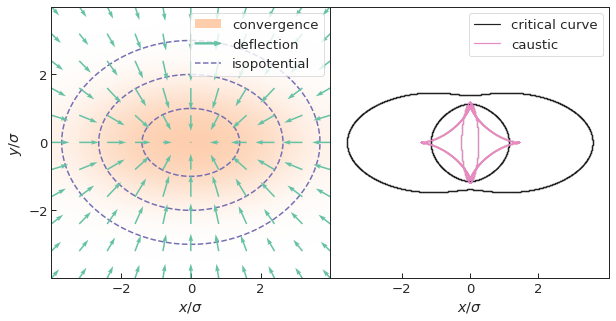

In [ ]:
interact(plot_gaussian_lens, 
         amplitude=FloatSlider(value=2., min=1., max=5, step=.5, continuous_update=False), 
         σ=FloatSlider(value=1., min=.5, max=2, step=.1, continuous_update=False),
         q=FloatSlider(value=.5, min=.05, max=1., step=.05, continuous_update=False));

#plot_gaussian_lens()

>**Figure 5.** Lensing quantities for an elliptical Gaussian convergence profile. **Left:** convergence  (orange shade), deflection field (green arrows), isopotential contours (blue, dashed contours). The arrow directions are for the negative of the deflection angles and the lengths are shrunk by a factor of 4 for nicer visualization. **Right:** Critical curves (black lines) and corresponding caustics (pink lines). The solid-contour caustic corresponds to the solid-contour critical curve, similarly dot-dashed contours correspond to each other. We express the gradient and the Hessian of the deflection potential for an elliptical Gaussian convergence using the complex error function, as a result we can efficiently compute them.

## Figure 6

<center><img align="center" src="https://docs.google.com/uc?export=download&id=159K76esRUol_0xhLwKlkYD3CHYjpepi6"  width="900"  /></center>

>**Figure 6.** Fitting synthetic lensing data with Gaussian components of an elliptical Sersic profile for the luminous component. We fit the dark component with an elliptical NFW profile. The Sersic parameters for the lens light are joint with the luminous mass distribution except for the amplitudes letting the global mass-to-light ratio be a free parameter. We generated the synthetic data for a composite model with elliptical NFW and elliptical Chameleon profiles. In the 'Reconstructed source' plot, the pink contours outline the caustics. The blue star indicates the point source position.  The green arrows in the 'Convergence and deflection' plot represent negative deflection angles and they are shrunk by a factor of 4 for nicer visualization. The red dots in the 'Magnification model' plot point out the image positions. Our method of computing lensing quantities for the Sersic profile with ellipticity in the convergence works well as evident from the 'Normalized Residual' plot. This method only takes approximately three times longer than using the fiducial model with the Chameleon profile. Unlike the Chameleon profile, however, our method is general.